In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'
%matplotlib widget
import numpy as np
import h5py

In [2]:
vert = []

for case in sorted(Path("data/").glob("rib*[1-3].hdf5")):
    with h5py.File(case, 'r') as f:
        Vmx = np.asarray(f['Vmx'])
        Umx = np.asarray(f['Umx'])
        (I,J) = f.attrs['I'], f.attrs['J']
        y = np.asarray(f['y'])
        L = f.attrs['L']
        Q = f.attrs['Q']
    y_reshape = y.reshape((J,I))
    v_bar = np.nanmean(Vmx,0).reshape((J,I))
    u_bar = np.nanmean(Umx,0).reshape((J,I))
    if L == 50:
        v_bar_utval = v_bar[:,38:107]
        u_bar_utval = u_bar[:,38:107]
    elif L==75:
        v_bar_utval = v_bar[:,11:100]
        u_bar_utval = u_bar[:,11:100]
    else:
        v_bar_utval = v_bar[:,40:100]
        u_bar_utval = u_bar[:,40:100]
    vert.append(dict(Q=Q, L=L, v = np.nanmean(v_bar_utval,axis=1), y = y_reshape[:,0], filename = case.stem, u=np.nanmean(u_bar_utval,axis=1)))    

/tmp/ipykernel_3592997/955589775.py:12: RuntimeWarning: Mean of empty slice
  v_bar = np.nanmean(Vmx,0).reshape((J,I))
/tmp/ipykernel_3592997/955589775.py:13: RuntimeWarning: Mean of empty slice
  u_bar = np.nanmean(Umx,0).reshape((J,I))
/tmp/ipykernel_3592997/955589775.py:23: RuntimeWarning: Mean of empty slice
  vert.append(dict(Q=Q, L=L, v = np.nanmean(v_bar_utval,axis=1), y = y_reshape[:,0], filename = case.stem, u=np.nanmean(u_bar_utval,axis=1)))


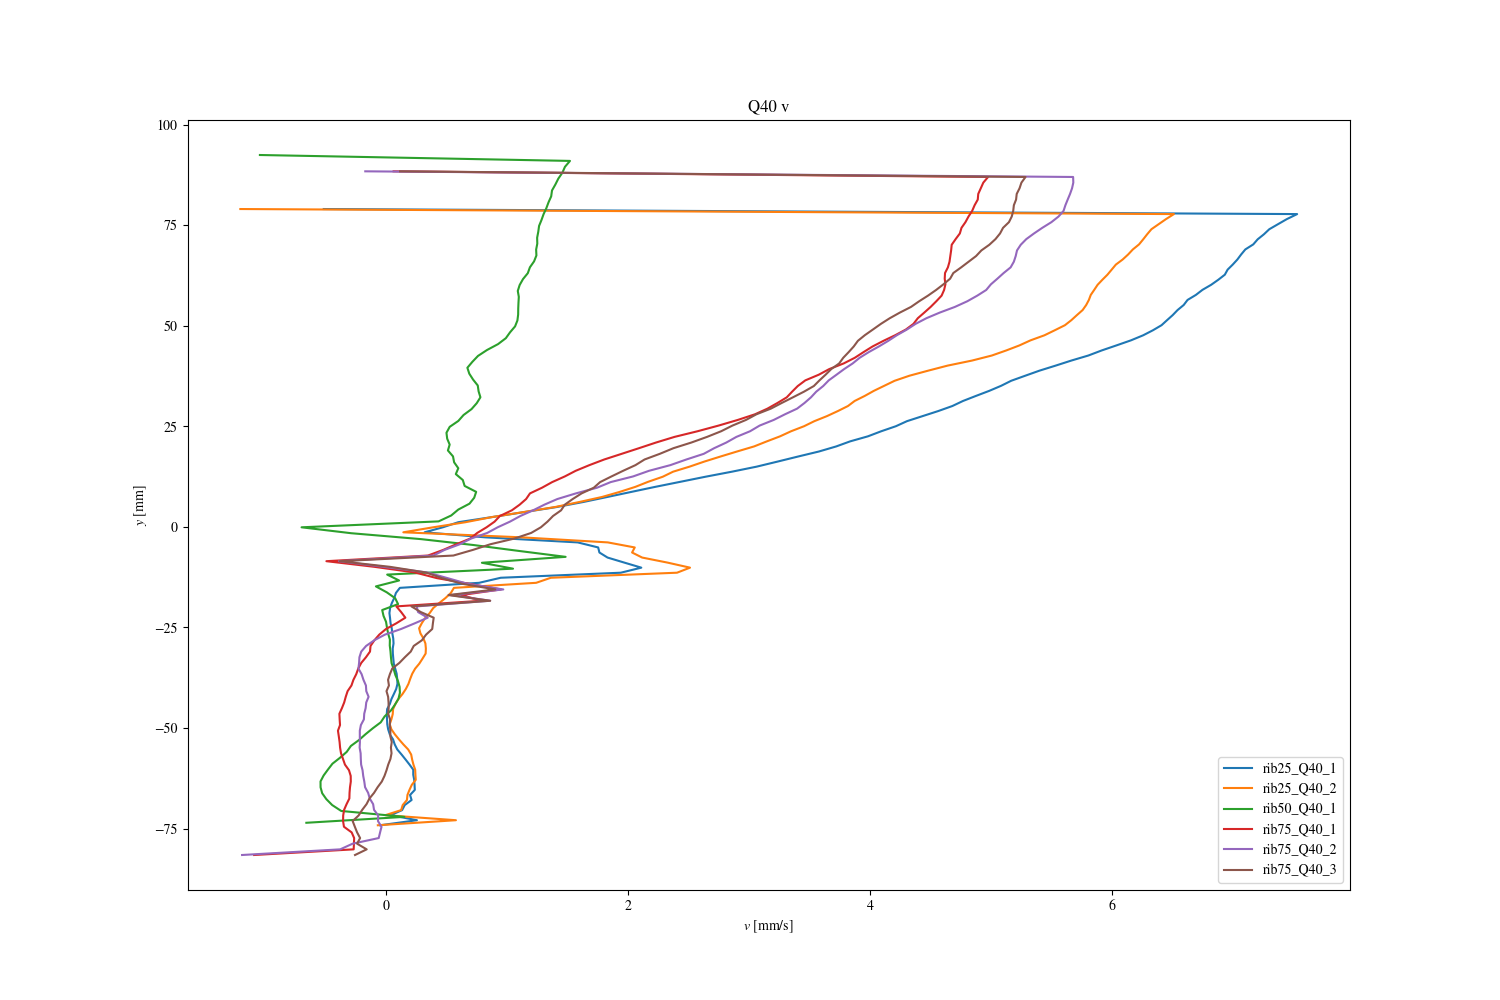

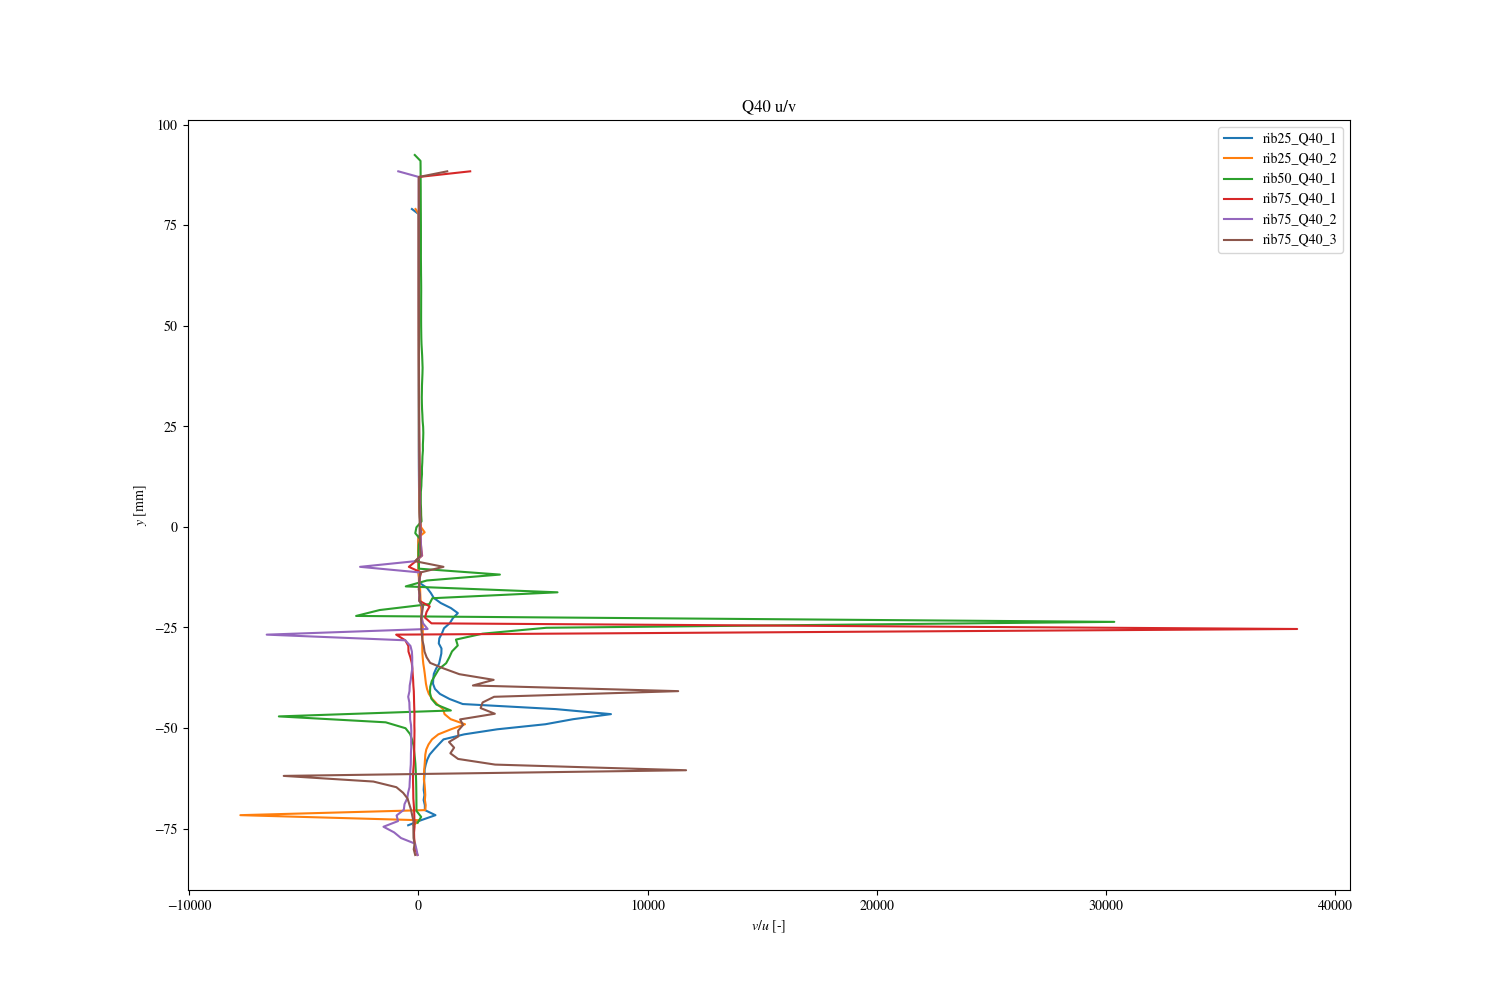

In [3]:
# for flow in [20,40,60,80,100]:
for flow in [40]:
    fig,ax = plt.subplots(figsize=(15,10))
    for f in vert: 
        if f['Q'] == flow:
            ax.plot(f['v'],f['y'],label=f['filename'])
            ax.set_title(f"Q{f['Q']} v")
    ax.legend()
    ax.set_xlabel(r'$v$ [mm/s]')
    ax.set_ylabel(r'$y$ [mm]')
    
    fig2,ax2 = plt.subplots(figsize=(15,10))
    for f in vert: 
        if f['Q'] == flow:
            ax2.plot(f['u']/f['v'],f['y'],label=f['filename'])
            ax2.set_title(f"Q{f['Q']} u/v")
    ax2.legend()
    ax2.set_xlabel(r'$v/u$ [-]')
    ax2.set_ylabel(r'$y$ [mm]')